In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# CLEANING THE DATASET

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train['Age'] = np.log(train['Age']+1)
train['Fare'] = np.log(train['Fare']+1)

In [5]:
df = train.copy()
df['Age'] = df.groupby('Survived')['Age'].transform(lambda x: x.fillna(np.mean(x.dropna().astype('int64'))))
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df['Embarked'] = df['Embarked'].fillna('S')
df['Family'] = df['SibSp'] + df['Parch']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
x = df.drop('Survived', axis=1)
y = df['Survived']

# Applying machine learning models

In [9]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
num_feat = ['Age', 'Fare']
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_feat = ['Embarked', 'Sex', 'Pclass']
cat_trans = OneHotEncoder(handle_unknown='ignore')

prepro = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_feat),
        ('cat', cat_trans, cat_feat)])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)
#LOGISTIC REGRESSION
logclf = Pipeline(steps=[('preprocessor', prepro),
                      ('classifier', LogisticRegression(random_state=6))])
logclf.fit(X_train, y_train)
logscore = logclf.score(X_test, y_test)

#SUPPORT VECTOR MACHINE
svmclf = Pipeline(steps=[('preprocessor', prepro),
                      ('classifier', svm.SVC(random_state = 7))])
svmclf.fit(X_train, y_train)
svmscore = svmclf.score(X_test, y_test)

#KNEIGHBORS CLASSIFIER
knnclf = Pipeline(steps=[('preprocessor', prepro),
                      ('classifier', KNeighborsClassifier(n_neighbors=6))])
knnclf.fit(X_train, y_train)
knnscore = knnclf.score(X_test, y_test)


#RANDOM FOREST CLASSIFIER
rfclf = Pipeline(steps=[('preprocessor', prepro), ('classifier', RandomForestClassifier(n_estimators=1000, random_state = 30))])
rfclf.fit(X_train, y_train)
rfscore = rfclf.score(X_test, y_test)

#GRADIENT BOOSTING CLASSIFIER
gbcclf = Pipeline(steps=[('preprocessor',prepro), ('classifier', GradientBoostingClassifier())])
gbcclf.fit(X_train, y_train)
gbcscore = gbcclf.score(X_test, y_test)

#DECISION TREE
dtclf = Pipeline(steps=[('preprocessor',prepro), ('classifier', tree.DecisionTreeClassifier())])
dtclf.fit(X_train, y_train)
dtscore = dtclf.score(X_test, y_test)

# Hyperparameter tuning

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#LOGISTIC REGRESSION TUNING


In [13]:
Model = ['Logistic Regression', 'SVM', 'KNeighbors', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
Score = [logscore, svmscore, knnscore, rfscore, gbcscore, dtscore]
final_score = pd.DataFrame({'Model':Model, 'Score':Score})
final_score

,Model,Score
0,Logistic Regression,0.810056
1,SVM,0.826816
2,KNeighbors,0.849162
3,Random Forest,0.882682
4,Gradient Boosting,0.871508
5,Decision Tree,0.849162


In [75]:
testt = pd.read_csv('test.csv')
testt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
test = testt.copy()
test['Age'] = np.log(test['Age']+1)
test['Fare'] = np.log(test['Fare']+1)

In [77]:
test['Age'] = test['Age'].fillna(df['Age'].mean())
test['Fare'] = test['Fare'].fillna(df['Fare'].mean())
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test['Family'] = test['SibSp'] + test['Parch']

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [79]:
y_pred = logclf.predict(test)

In [80]:
gender_sub = pd.read_csv('gender_submission.csv')

In [81]:
test_y = gender_sub['Survived']

In [92]:
pd.crosstab(test_y, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,260,6
1,10,142


In [93]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       266
           1       0.96      0.93      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



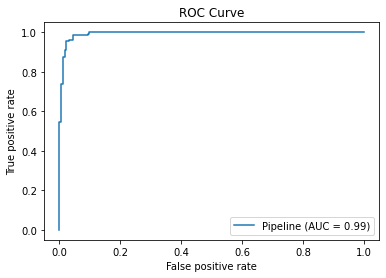

In [94]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logclf, test, test_y)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');

In [96]:
final_data = {'PassengerId': testt['PassengerId'], 'Survived': y_pred}
sub = pd.DataFrame(data=final_data)
sub.to_csv('subfile.csv',index =False)